In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os

In [ ]:
%%writefile .env

TAVILY_API_KEY = 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
JINA_API_KEY = jina_759c2be502d84a939ed1f0f668aaa6289u5wP72IzFrFZWi270KNIRwXFOpd
CHROME_INSTANCE_PATH = /Applications/Google Chrome.app/Contents/MacOS/Google Chrome
BROWSER_HEADLESS=False
#DEEPSEEK_API_KEY = 
#OPENAI_API_KEY = 

In [3]:
# 환경변수 사용 예시
secret_key = os.environ.get("BROWSER_HEADLESS")
print(f"Secret Key: {secret_key}")

from src.config import CHROME_INSTANCE_PATH, BROWSER_HEADLESS

print ("CHROME_INSTANCE_PATH", CHROME_INSTANCE_PATH)
print ("BROWSER_HEADLESS", BROWSER_HEADLESS)

Secret Key: None
sdsdsd BROWSER_HEADLESS False
CHROME_INSTANCE_PATH /Applications/Google Chrome.app/Contents/MacOS/Google Chrome
BROWSER_HEADLESS False


In [4]:
import sys
from src.workflow import run_agent_workflow


DEBUG [src.utils.bedrock] Create new client, Using region: us-west-2

DEBUG [src.utils.bedrock] Using profile: None

DEBUG [src.utils.bedrock] boto3 Bedrock client successfully created!

DEBUG [src.utils.bedrock] Create new client, Using region: us-west-2

DEBUG [src.utils.bedrock] Using profile: None

DEBUG [src.utils.bedrock] boto3 Bedrock client successfully created!

DEBUG [src.utils.bedrock] Create new client, Using region: us-west-2

DEBUG [src.utils.bedrock] Using profile: None

DEBUG [src.utils.bedrock] boto3 Bedrock client successfully created!


boto3 Bedrock client successfully created!
bedrock-runtime(https://bedrock-runtime.us-west-2.amazonaws.com)
boto3 Bedrock client successfully created!
bedrock-runtime(https://bedrock-runtime.us-west-2.amazonaws.com)
boto3 Bedrock client successfully created!
bedrock-runtime(https://bedrock-runtime.us-west-2.amazonaws.com)
INFO     [browser_use] BrowserUse logging setup complete with level info
INFO     [root] Anonymized telemetry enabled. See https://github.com/browser-use/browser-use for more information.


In [5]:
#user_query = "부산 여행을 위한 계획서를 작성해줘. 맛집 위주로, Browser 사용을 우선시 해줘"
#user_query = '"./data-pq" 디렉토리안의 데이터를 기반으로 인사이트 추출을 위한 분석 리포트를 작성해줘. "./tbl_trend_analysis_desc_20250307.xlsx" 파일은 데이터에 대한 컬럼 설명이야. 보고서에는 필요하다면 중간과정에서 생성된 차트, 이미지도 함께 넣어서 구성해줘.'
#user_query = '4-6세를 위한 미술활동 프로그램을 1월-12월까지 각 월당 프로그램 4개씩 기획해줘. 프로그램별 필요 재료, 예상 비용 및 프로그램에 대한 부모님 브리핑용 문서(5문장 이내)도 만들어줘.'
#user_query = "ko-reranker에 대해 조사하고 pdf 리포트를 작성해줘"
#user_query = "아트앤하트 상계벽산 교육원에 대한 내용을 조사하고 원장에 대해서도 알려줘"
#user_query = "지난 한달간 아마존 주식 분석을 해줘."
user_query = '''
    "./data-pq" 디렉토리는 판매 트랜드를 분석할 수 있는 데이터셋 입니다.
    "./trend_analysis_desc.json" 파일은 데이터에 대한 컬럼 설명입니다.
    인사이트 추출을 위한 분석 보고서를 작성하여 markdown 파일로 만들어주세요.
    - 보고서에는 중간 과정에서 생성된 차트와 차트에 대한 설명을 상세하게 포함하여 주세요.
    - 최근 몇년간의 데이터를 분석해서 LG가전 전체의 판매 트렌드를 분석합니다. 판매 증감, 판매 채널별 판매 증감, 구매 고객들의 특성의 변화, 판매 채널별 구매 고객들의 특성 변화를 분석합니다.
    그리고 특정 제품의 판매 트렌드를 분석합니다. 예를들어 스타일러 판매 증감, 판매 채널별 스타일러 판매 증감, 스타일러 구매 고객들의 특성 변화, 판매 채널별로 스타일러 구매 고객들의 특성변화를 분석합니다.
    (여기에서 구매 고객들의 특성이라고 함은, 성별, 연령, 지역, 주택 공시가격, 주택평형 등입니다.) 이러한 Case들을 분석해서 가전 전체의 판매 트렌드/구매고객 특성과 스타일러 판매 트렌드/구매고객 특성의 주요한 차이점, 유사한 부분을 정리합니다.
    '''
#가용한 TEAM_MEMBER는 "Coder", "Reporter"이고 coder는 1스텝만 적용해줘. task_tracker 단계는 skip해줘. 기능 테스트 중이거든
#
#

## Report 에 클루가 있다는것 프롬프트에 반영하기

'./artifacts/' 폴더를 삭제합니다...
'./artifacts/' 폴더가 성공적으로 삭제되었습니다.
INFO     [src.workflow] Starting workflow with user input: 
    "./data-pq" 디렉토리는 판매 트랜드를 분석할 수 있는 데이터셋 입니다.
    "./trend_analysis_desc.json" 파일은 데이터에 대한 컬럼 설명입니다.
    인사이트 추출을 위한 분석 보고서를 작성하여 markdown 파일로 만들어주세요.
    - 보고서에는 중간 과정에서 생성된 차트와 차트에 대한 설명을 상세하게 포함하여 주세요.
    - 최근 몇년간의 데이터를 분석해서 LG가전 전체의 판매 트렌드를 분석합니다. 판매 증감, 판매 채널별 판매 증감, 구매 고객들의 특성의 변화, 판매 채널별 구매 고객들의 특성 변화를 분석합니다.
    그리고 특정 제품의 판매 트렌드를 분석합니다. 예를들어 스타일러 판매 증감, 판매 채널별 스타일러 판매 증감, 스타일러 구매 고객들의 특성 변화, 판매 채널별로 스타일러 구매 고객들의 특성변화를 분석합니다.
    (여기에서 구매 고객들의 특성이라고 함은, 성별, 연령, 지역, 주택 공시가격, 주택평형 등입니다.) 이러한 Case들을 분석해서 가전 전체의 판매 트렌드/구매고객 특성과 스타일러 판매 트렌드/구매고객 특성의 주요한 차이점, 유사한 부분을 정리합니다.
    



INFO [src.graph.nodes] ===== Coordinator talking...... =====

DEBUG [src.utils.bedrock] Create new client, Using region: us-west-2

DEBUG [src.utils.bedrock] Using profile: None



DEBUG [src.utils.bedrock] boto3 Bedrock client successfully created!


boto3 Bedrock client successfully created!
bedrock-runtime(https://bedrock-runtime.us-west-2.amazonaws.com)
enable_reasoning False
self.llm.additional_model_request_fields None
self.llm.inference_config {'maxTokens': 8192, 'temperature': 0.01}
handoff_to_planner: I'll need to consult our planning system for this request.

This appears to be a complex data analysis task requiring:
1. Analysis of sales trend data from "./data-pq" directory
2. Column information interpretation from "./trend_analysis_desc.json"
3. Creation of a detailed markdown report with charts
4. Analysis of LG appliance sales trends and Styler-specific trends
5. Customer demographic analysis
6. Comparative analysis between general appliance and Styler sales patterns

I'll hand this over to the planner for a structured approach to this analysis task.


DEBUG [src.graph.nodes] 
Current state messages:
[ { 'content': [ { 'text': '\n'
                           'Here is a user request: <user_request>\n'
                           '    "./data-pq" 디렉토리는 판매 트랜드를 분석할 수 있는 데이터셋 입니다.\n'
                           '    "./trend_analysis_desc.json" 파일은 데이터에 대한 컬럼 설명입니다.\n'
                           '    인사이트 추출을 위한 분석 보고서를 작성하여 markdown 파일로 만들어주세요.\n'
                           '    - 보고서에는 중간 과정에서 생성된 차트와 차트에 대한 설명을 상세하게 포함하여 주세요.\n'
                           '    - 최근 몇년간의 데이터를 분석해서 LG가전 전체의 판매 트렌드를 분석합니다. 판매 증감, 판매 채널별 판매 증감, '
                           '구매 고객들의 특성의 변화, 판매 채널별 구매 고객들의 특성 변화를 분석합니다.\n'
                           '    그리고 특정 제품의 판매 트렌드를 분석합니다. 예를들어 스타일러 판매 증감, 판매 채널별 스타일러 판매 증감, 스타일러 '
                           '구매 고객들의 특성 변화, 판매 채널별로 스타일러 구매 고객들의 특성변화를 분석합니다.\n'
                           '    (여기에서 구매 고객들의 특성이라고 함은, 성별, 연령, 지역, 주택 공시가격, 주택평형 등입니다.) 이러한 '
                           'Case들을 분석해서 가전 전체의 판매 트렌드/구매고객 특성과 스타

boto3 Bedrock client successfully created!
bedrock-runtime(https://bedrock-runtime.us-west-2.amazonaws.com)



DEBUG [src.utils.bedrock] boto3 Bedrock client successfully created!


boto3 Bedrock client successfully created!
bedrock-runtime(https://bedrock-runtime.us-west-2.amazonaws.com)
enable_reasoning True
self.llm.additional_model_request_fields {'thinking': {'type': 'enabled', 'budget_tokens': 8192}}
self.llm.inference_config {'maxTokens': 24576, 'temperature': 1.0}
### Task Analysis:

The user is asking for a data analysis and report based on the "./data-pq" directory dataset which contains sales trend data. They want us to:

1. Analyze sales trends for LG appliances overall
   - Overall sales growth/decline
   - Sales by channel
   - Changes in customer characteristics
   - Changes in customer characteristics by sales channel

2. Analyze sales trends for a specific product (Styler)
   - Overall sales growth/decline
   - Sales by channel
   - Changes in customer characteristics
   - Changes in customer characteristics by sales channel

3. Compare the trends between overall appliance sales and Styler sales
   - Identify key differences
   - Identify similari


DEBUG [src.graph.nodes] 
Planner - current state messages:
[ { 'content': [ { 'text': '\n'
                           'Here is a user request: <user_request>\n'
                           '    "./data-pq" 디렉토리는 판매 트랜드를 분석할 수 있는 데이터셋 입니다.\n'
                           '    "./trend_analysis_desc.json" 파일은 데이터에 대한 컬럼 설명입니다.\n'
                           '    인사이트 추출을 위한 분석 보고서를 작성하여 markdown 파일로 만들어주세요.\n'
                           '    - 보고서에는 중간 과정에서 생성된 차트와 차트에 대한 설명을 상세하게 포함하여 주세요.\n'
                           '    - 최근 몇년간의 데이터를 분석해서 LG가전 전체의 판매 트렌드를 분석합니다. 판매 증감, 판매 채널별 판매 증감, '
                           '구매 고객들의 특성의 변화, 판매 채널별 구매 고객들의 특성 변화를 분석합니다.\n'
                           '    그리고 특정 제품의 판매 트렌드를 분석합니다. 예를들어 스타일러 판매 증감, 판매 채널별 스타일러 판매 증감, 스타일러 '
                           '구매 고객들의 특성 변화, 판매 채널별로 스타일러 구매 고객들의 특성변화를 분석합니다.\n'
                           '    (여기에서 구매 고객들의 특성이라고 함은, 성별, 연령, 지역, 주택 공시가격, 주택평형 등입니다.) 이러한 '
                           'Case들을 분석해서 가전 전체의 판매 트렌드/구

boto3 Bedrock client successfully created!
bedrock-runtime(https://bedrock-runtime.us-west-2.amazonaws.com)
enable_reasoning False
self.llm.additional_model_request_fields None
self.llm.inference_config {'maxTokens': 24576, 'temperature': 0.01}
{"next": "coder"}


DEBUG [src.graph.nodes] 
Supervisor - current state messages:
[ { 'content': [ { 'text': '{\n'
                           '  "thought": "I need to plan a comprehensive analysis of LG appliance '
                           'sales trends, focusing both on overall trends and specifically on '
                           "Styler product. The data is available in the './data-pq' directory, "
                           "with column descriptions in './trend_analysis_desc.json'. I'll assign "
                           'the Coder to perform all data analysis tasks including data loading, '
                           "exploration, analysis, and visualization. Then, I'll have the Reporter "
                           'compile all findings into a detailed markdown report with charts and '
                           'explanations.",\n'
                           '  "title": "LG 가전 판매 트렌드 분석 및 보고서 작성",\n'
                           '  "steps": [\n'
                           '    {\n'
             

boto3 Bedrock client successfully created!
bedrock-runtime(https://bedrock-runtime.us-west-2.amazonaws.com)

--- 대화 턴 1 ---
enable_reasoning False
self.llm.additional_model_request_fields None
self.llm.inference_config {'maxTokens': 8192, 'temperature': 0.01}
계획에 따라 첫 번째 단계인 데이터 로드와 탐색부터 시작하겠습니다.

1. 먼저 필요한 디렉토리와 파일이 존재하는지 확인하고
2. JSON 파일에서 컬럼 설명을 로드한 후
3. Parquet 데이터를 로드하여 기본적인 데이터 탐색을 수행하겠습니다.{"code": "import os\nimport json\nimport pandas as pd\nimport numpy as np\nimport matplotlib.pyplot as plt\nimport seaborn as sns\nfrom datetime import datetime\n\n# 한글 폰트 설정\nplt.rcParams['font.family'] = 'NanumGothic'\nplt.rcParams['axes.unicode_minus'] = False\n\n# 디렉토리와 파일 존재 여부 확인\nprint(\"=== 디렉토리 및 파일 확인 ===\")\nprint(f\"./data-pq 디렉토리 존재: {os.path.exists('./data-pq')}\")\nprint(f\"컬럼 설명 파일 존재: {os.path.exists('./trend_analysis_desc.json')}\")\n\nif os.path.exists('./trend_analysis_desc.json'):\n    # 컬럼 설명 로드\n    with open('./trend_analysis_desc.json', 'r', encoding='utf-8') as f:\n    


INFO [src.tools.python_repl] ===== Executing Python code =====


WARNING  [langchain_experimental.utilities.python] Python REPL can execute arbitrary code. Use with caution.



INFO [src.tools.python_repl] ===== Code execution successful =====


DEBUG    [src.tools.decorators] Tool handle_python_repl_tool returned: Successfully executed:
```python
import os
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

# 한글 폰트 설정
plt.rcParams['font.family'] = 'NanumGothic'
plt.rcParams['axes.unicode_minus'] = False

# 디렉토리와 파일 존재 여부 확인
print("=== 디렉토리 및 파일 확인 ===")
print(f"./data-pq 디렉토리 존재: {os.path.exists('./data-pq')}")
print(f"컬럼 설명 파일 존재: {os.path.exists('./trend_analysis_desc.json')}")

if os.path.exists('./trend_analysis_desc.json'):
    # 컬럼 설명 로드
    with open('./trend_analysis_desc.json', 'r', encoding='utf-8') as f:
        column_desc = json.load(f)
    print("\n=== 컬럼 설명 ===")
    print(json.dumps(column_desc, indent=2, ensure_ascii=False))

if os.path.exists('./data-pq'):
    # Parquet 파일 목록 확인
    print("\n=== Parquet 파일 목록 ===")
    parquet_files = [f for f in os.listdir('./data-pq') if f.endswith('.parquet')]
    print("\n".join(parquet_f


INFO [src.tools.python_repl] ===== Executing Python code =====

INFO [src.tools.python_repl] ===== Code execution successful =====


DEBUG    [src.tools.decorators] Tool handle_python_repl_tool returned: Successfully executed:
```python
import pandas as pd

# 첫 번째 파일 로드하여 데이터 구조 확인
first_file = './data-pq/tbl_trend_analysis_sample_0000_part_00.parquet'
df_sample = pd.read_parquet(first_file)

print("=== 데이터 구조 확인 ===")
print("\n컬럼 목록:")
print(df_sample.columns.tolist())

print("\n데이터 타입:")
print(df_sample.dtypes)

print("\n처음 5개 행:")
print(df_sample.head())

print("\n기본 통계 정보:")
print(df_sample.describe())
```
Stdout: === 데이터 구조 확인 ===

컬럼 목록:
['base_mm', 'src_sys_cd', 'pdfm_dv_val', 'chnl_div_hpos_val', 'chnl_div_val', 'gendr_nm', 'age', 'age_group', 'rst_ctdo_nm', 'eqdr_group', 'rst_puan_prc', 'all_eci_group', 'rank', 'grade', 'buy_qt']

데이터 타입:
base_mm               object
src_sys_cd            object
pdfm_dv_val           object
chnl_div_hpos_val     object
chnl_div_val          object
gendr_nm              object
age                  float64
age_group             object
rst_ctdo_nm           object
eqdr_group  


INFO [src.tools.python_repl] ===== Executing Python code =====

INFO [src.tools.python_repl] ===== Code execution successful =====


DEBUG    [src.tools.decorators] Tool handle_python_repl_tool returned: Successfully executed:
```python
import pandas as pd
import os

# 모든 parquet 파일 통합
parquet_files = [f for f in os.listdir('./data-pq') if f.endswith('.parquet')]
df_list = []

for file in parquet_files:
    file_path = os.path.join('./data-pq', file)
    df = pd.read_parquet(file_path)
    df_list.append(df)

# 데이터프레임 통합
df_full = pd.concat(df_list, ignore_index=True)

# 기본 정보 출력
print("=== 전체 데이터셋 정보 ===")
print(f"\n전체 레코드 수: {len(df_full):,}")
print(f"중복 레코드 수: {df_full.duplicated().sum():,}")

# 결측치 확인
print("\n결측치 현황:")
missing_info = df_full.isnull().sum()
missing_pct = (df_full.isnull().sum() / len(df_full)) * 100
missing_df = pd.DataFrame({
    '결측치 수': missing_info,
    '결측치 비율(%)': missing_pct
})
print(missing_df)

# 기본 통계 정보
print("\n수치형 데이터 기본 통계:")
print(df_full.describe())

# 범주형 변수의 고유값 개수
categorical_cols = df_full.select_dtypes(include=['object']).columns
print("\n범주형 변수의 고유값 개수:")
for col in categor


INFO [src.tools.python_repl] ===== Executing Python code =====

INFO [src.tools.python_repl] ===== Code execution successful =====


DEBUG    [src.tools.decorators] Tool handle_python_repl_tool returned: Successfully executed:
```python
import pandas as pd
import os
from datetime import datetime

# 모든 parquet 파일 통합
parquet_files = [f for f in os.listdir('./data-pq') if f.endswith('.parquet')]
df_list = []

for file in parquet_files:
    file_path = os.path.join('./data-pq', file)
    df = pd.read_parquet(file_path)
    df_list.append(df)

# 데이터프레임 통합
df_full = pd.concat(df_list, ignore_index=True)

# 기본 정보 출력
print("=== 전체 데이터셋 정보 ===")
print(f"\n전체 레코드 수: {len(df_full):,}")
print(f"중복 레코드 수: {df_full.duplicated().sum():,}")

# 결측치 확인
print("\n결측치 현황:")
missing_info = df_full.isnull().sum()
missing_pct = (df_full.isnull().sum() / len(df_full)) * 100
missing_df = pd.DataFrame({
    '결측치 수': missing_info,
    '결측치 비율(%)': missing_pct
})
print(missing_df)

# 기본 통계 정보
print("\n수치형 데이터 기본 통계:")
print(df_full.describe())

# 범주형 변수의 고유값 개수
categorical_cols = df_full.select_dtypes(include=['object']).columns
print("\n범주형 변수


INFO [src.tools.python_repl] ===== Executing Python code =====

INFO [src.tools.python_repl] ===== Code execution successful =====


DEBUG    [src.tools.decorators] Tool handle_python_repl_tool returned: Successfully executed:
```python
import pandas as pd
import os
from datetime import datetime

# 모든 parquet 파일 통합
parquet_files = [f for f in os.listdir('./data-pq') if f.endswith('.parquet')]
df_list = []

print("파일 로딩 시작...")
for file in parquet_files:
    file_path = os.path.join('./data-pq', file)
    df = pd.read_parquet(file_path)
    df_list.append(df)

# 데이터프레임 통합
df_full = pd.concat(df_list, ignore_index=True)
print("파일 로딩 완료!")

# 기본 정보 출력
print("\n=== 전체 데이터셋 정보 ===")
print(f"전체 레코드 수: {len(df_full):,}")
print(f"중복 레코드 수: {df_full.duplicated().sum():,}")

# 결측치 확인
print("\n=== 결측치 현황 ===")
missing_info = df_full.isnull().sum()
missing_pct = (df_full.isnull().sum() / len(df_full)) * 100
missing_df = pd.DataFrame({
    '결측치 수': missing_info,
    '결측치 비율(%)': missing_pct
})
print(missing_df)

# 기본 통계 정보
print("\n=== 수치형 데이터 기본 통계 ===")
print(df_full.describe())

# 범주형 변수의 고유값 개수
categorical_cols = df_full.sel


INFO [src.tools.python_repl] ===== Executing Python code =====

INFO [src.tools.python_repl] ===== Code execution successful =====


DEBUG    [src.tools.decorators] Tool handle_python_repl_tool returned: Successfully executed:
```python
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

# 저장된 데이터 로드
df_full = pd.read_pickle('./artifacts/processed_data.pkl')

# 한글 폰트 설정
plt.rcParams['font.family'] = 'NanumGothic'
plt.rcParams['axes.unicode_minus'] = False

# 1. 전체 판매 트렌드 분석
monthly_sales = df_full.groupby('base_mm').size().reset_index(name='sales')
monthly_sales = monthly_sales.sort_values('base_mm')

# 전체 판매 트렌드 시각화
plt.figure(figsize=(15, 6))
plt.plot(monthly_sales['base_mm'], monthly_sales['sales'], marker='o')
plt.title('LG가전 전체 월별 판매량 추이')
plt.xlabel('날짜')
plt.ylabel('판매량')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('./artifacts/overall_sales_trend.png')
plt.close()

# 2. 채널별 판매 트렌드
channel_sales = df_full.groupby(['base_mm', 'chnl_div_val']).size().reset_index(name='sales')
channel_sales_pivot = channel_sales.pivot(index='base_mm',


INFO [src.tools.python_repl] ===== Executing Python code =====

INFO [src.tools.python_repl] ===== Code execution successful =====


DEBUG    [src.tools.decorators] Tool handle_python_repl_tool returned: Successfully executed:
```python
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

# 저장된 데이터 로드
df_full = pd.read_pickle('./artifacts/processed_data.pkl')

# 한글 폰트 설정
plt.rcParams['font.family'] = 'NanumGothic'
plt.rcParams['axes.unicode_minus'] = False

# 1. 성별 분석
gender_sales = df_full['gendr_nm'].value_counts()
plt.figure(figsize=(8, 6))
gender_sales.plot(kind='bar')
plt.title('성별 구매 분포')
plt.xlabel('성별')
plt.ylabel('구매 건수')
plt.tight_layout()
plt.savefig('./artifacts/gender_sales.png')
plt.close()

# 성별 월별 트렌드
gender_monthly = df_full.groupby(['base_mm', 'gendr_nm']).size().unstack()
plt.figure(figsize=(15, 6))
gender_monthly.plot(marker='o')
plt.title('성별 월별 구매 트렌드')
plt.xlabel('날짜')
plt.ylabel('구매 건수')
plt.grid(True)
plt.legend(title='성별')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('./artifacts/gender_monthly_trend.png')
plt.close()

# 2. 연령대별 


INFO [src.tools.python_repl] ===== Executing Python code =====

INFO [src.tools.python_repl] ===== Code execution successful =====


DEBUG    [src.tools.decorators] Tool handle_python_repl_tool returned: Successfully executed:
```python
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

# 저장된 데이터 로드
df_full = pd.read_pickle('./artifacts/processed_data.pkl')

# 스타일러 데이터 필터링
df_styler = df_full[df_full['pdfm_dv_val'].str.contains('스타일러', na=False)]

# 1. 스타일러 판매 트렌드 분석
styler_monthly = df_styler.groupby('base_mm').size().reset_index(name='sales')
styler_monthly = styler_monthly.sort_values('base_mm')

# 전체 판매량과 스타일러 판매량 비교
plt.figure(figsize=(15, 6))
total_monthly = df_full.groupby('base_mm').size()
styler_monthly_series = df_styler.groupby('base_mm').size()

# 판매량을 상대 비율로 변환 (최대값 대비 %)
total_monthly_norm = (total_monthly / total_monthly.max()) * 100
styler_monthly_norm = (styler_monthly_series / styler_monthly_series.max()) * 100

plt.plot(total_monthly_norm.index, total_monthly_norm.values, label='전체 가전', marker='o')
plt.plot(styler_monthly_norm.index, styler_mon


DEBUG [src.graph.nodes] 
Coder - current state messages:
[ { 'content': [ { 'text': '{\n'
                           '  "thought": "I need to plan a comprehensive analysis of LG appliance '
                           'sales trends, focusing both on overall trends and specifically on '
                           "Styler product. The data is available in the './data-pq' directory, "
                           "with column descriptions in './trend_analysis_desc.json'. I'll assign "
                           'the Coder to perform all data analysis tasks including data loading, '
                           "exploration, analysis, and visualization. Then, I'll have the Reporter "
                           'compile all findings into a detailed markdown report with charts and '
                           'explanations.",\n'
                           '  "title": "LG 가전 판매 트렌드 분석 및 보고서 작성",\n'
                           '  "steps": [\n'
                           '    {\n'
                  

응답 상태: end_turn
최종 응답을 받았습니다.

=== 대화 완료 ===
최종 응답:
 {'text': "\n\n모든 분석이 완료되었습니다. 주요 분석 결과를 요약하면 다음과 같습니다:\n\n1. **전체 LG가전 판매 트렌드**:\n   - 월평균 판매량: 24,157개\n   - 채널별 비중: 전매(50.4%), 온라인(25.1%), D2C(10.6%), 혼매(9.2%), 기타(4.8%)\n   - 주 구매층: 30-40대(54.8%), 여성(56.7%)\n   - 주요 지역: 경기(33.1%), 서울(21.8%)\n\n2. **스타일러 판매 특성**:\n   - 전체 가전 대비 비중: 2.22% (20,898건)\n   - 채널별 비중: 전매(58.5%), 온라인(16.6%), 혼매(13.3%), D2C(8.7%)\n   - 주 구매층: 30-40대(69.1%), 여성(57.8%)\n   - 평균 연령: 41.9세 (전체 가전 46.3세 대비 낮음)\n\n3. **전체 가전과 스타일러의 주요 차이점**:\n   - 연령대 분포: 스타일러는 30-40대 비중이 더 높음(69.1% vs 54.8%)\n   - 판매 채널: 스타일러는 전매 비중이 더 높음(58.5% vs 50.4%)\n   - 구매자 연령: 스타일러 구매자의 평균 연령이 4.5세 더 낮음\n   - 여성 비중: 스타일러가 약간 더 높음(57.8% vs 54.9%)\n\n4. **공통점**:\n   - 전매 채널이 가장 높은 비중을 차지\n   - 여성 구매자가 더 많음\n   - 수도권(서울, 경기) 지역 구매 비중이 높음\n\n이러한 분석 결과와 함께 모든 시각화 자료가 './artifacts' 디렉토리에 저장되었으며, 상세한 분석 결과는 'all_results.txt' 파일에 누적되어 있습니다.", 'toolUse': None, 'stop_reason': 'end_turn'}
메시지:
 {'content': [{'text': "\n\n모든 분석이 완료되었습니다. 주요 분석 결과를 요


DEBUG [src.utils.bedrock] boto3 Bedrock client successfully created!


boto3 Bedrock client successfully created!
bedrock-runtime(https://bedrock-runtime.us-west-2.amazonaws.com)
enable_reasoning False
self.llm.additional_model_request_fields None
self.llm.inference_config {'maxTokens': 24576, 'temperature': 0.01}
{"next": "reporter"}


DEBUG [src.graph.nodes] 
Supervisor - current state messages:
[ { 'content': [ { 'text': 'Response from coder:\n'
                           '\n'
                           '<response>\n'
                           '\n'
                           '\n'
                           '모든 분석이 완료되었습니다. 주요 분석 결과를 요약하면 다음과 같습니다:\n'
                           '\n'
                           '1. **전체 LG가전 판매 트렌드**:\n'
                           '   - 월평균 판매량: 24,157개\n'
                           '   - 채널별 비중: 전매(50.4%), 온라인(25.1%), D2C(10.6%), 혼매(9.2%), 기타(4.8%)\n'
                           '   - 주 구매층: 30-40대(54.8%), 여성(56.7%)\n'
                           '   - 주요 지역: 경기(33.1%), 서울(21.8%)\n'
                           '\n'
                           '2. **스타일러 판매 특성**:\n'
                           '   - 전체 가전 대비 비중: 2.22% (20,898건)\n'
                           '   - 채널별 비중: 전매(58.5%), 온라인(16.6%), 혼매(13.3%), D2C(8.7%)\n'
                           '   - 주 구매층: 30-40대(69.1%), 여성(57.8%)\n'
   

boto3 Bedrock client successfully created!
bedrock-runtime(https://bedrock-runtime.us-west-2.amazonaws.com)

--- 대화 턴 1 ---
enable_reasoning False
self.llm.additional_model_request_fields None
self.llm.inference_config {'maxTokens': 24576, 'temperature': 0.01}
I'll help you create a comprehensive report based on the analysis results. First, let's check the contents of the all_results.txt file to get all the detailed information.{"cmd": "ls -la ./artifacts/"}======
응답 상태: tool_use
모델이 도구 사용을 요청했습니다.
요청된 도구:
 bash_tool
입력 데이터:
 {'cmd': 'ls -la ./artifacts/'}
DEBUG    [src.tools.decorators] Tool handle_bash_tool called with parameters: cmd=ls -la ./artifacts/
INFO     [src.tools.bash_tool] Executing Bash Command: ls -la ./artifacts/
DEBUG    [src.tools.decorators] Tool handle_bash_tool returned: total 73940
drwxr-xr-x 2 sagemaker-user users     4096 Apr 23 09:59 .
drwxr-xr-x 9 sagemaker-user users     4096 Apr 23 09:55 ..
-rw-r--r-- 1 sagemaker-user users    19897 Apr 23 09:58 age_sales.p


INFO [src.tools.python_repl] ===== Executing Python code =====

INFO [src.tools.python_repl] ===== Code execution successful =====


DEBUG    [src.tools.decorators] Tool handle_python_repl_tool returned: Successfully executed:
```python
import os
import re
import matplotlib.pyplot as plt
from IPython.display import display, Image
import pandas as pd

# 결과 파일 로드
results_file = './artifacts/all_results.txt'
analyses = []

if os.path.exists(results_file):
    with open(results_file, 'r', encoding='utf-8') as f:
        content = f.read()
    
    # 분석 결과 블록 구분하기
    analysis_blocks = content.split("==================================================")
    
    for block in analysis_blocks:
        if not block.strip():
            continue
            
        # 분석 이름 추출
        analysis_name_match = re.search(r'## 분석 단계: (.*?)$', block, re.MULTILINE)
        analysis_name = analysis_name_match.group(1) if analysis_name_match else "분석 이름 없음"
        
        # 실행 시간 추출
        time_match = re.search(r'## 실행 시간: (.*?)$', block, re.MULTILINE)
        execution_time = time_match.group(1) if time_match else "시간 정보 없음"
     


INFO [src.tools.python_repl] ===== Executing Python code =====

INFO [src.tools.python_repl] ===== Code execution successful =====


DEBUG    [src.tools.decorators] Tool handle_python_repl_tool returned: Successfully executed:
```python
import os
import re

# 결과 파일 로드
results_file = './artifacts/all_results.txt'
analyses = []

if os.path.exists(results_file):
    with open(results_file, 'r', encoding='utf-8') as f:
        content = f.read()
    
    # 분석 결과 블록 구분하기
    analysis_blocks = content.split("=================================================")
    
    for block in analysis_blocks:
        if not block.strip():
            continue
            
        # 분석 이름 추출
        analysis_name_match = re.search(r'## 분석 단계: (.*?)$', block, re.MULTILINE)
        analysis_name = analysis_name_match.group(1) if analysis_name_match else "분석 이름 없음"
        
        # 실행 시간 추출
        time_match = re.search(r'## 실행 시간: (.*?)$', block, re.MULTILINE)
        execution_time = time_match.group(1) if time_match else "시간 정보 없음"
        
        # 결과 설명 추출
        results_section = block.split("분석 결과:", 1)
        results_text =


INFO [src.tools.python_repl] ===== Executing Python code =====


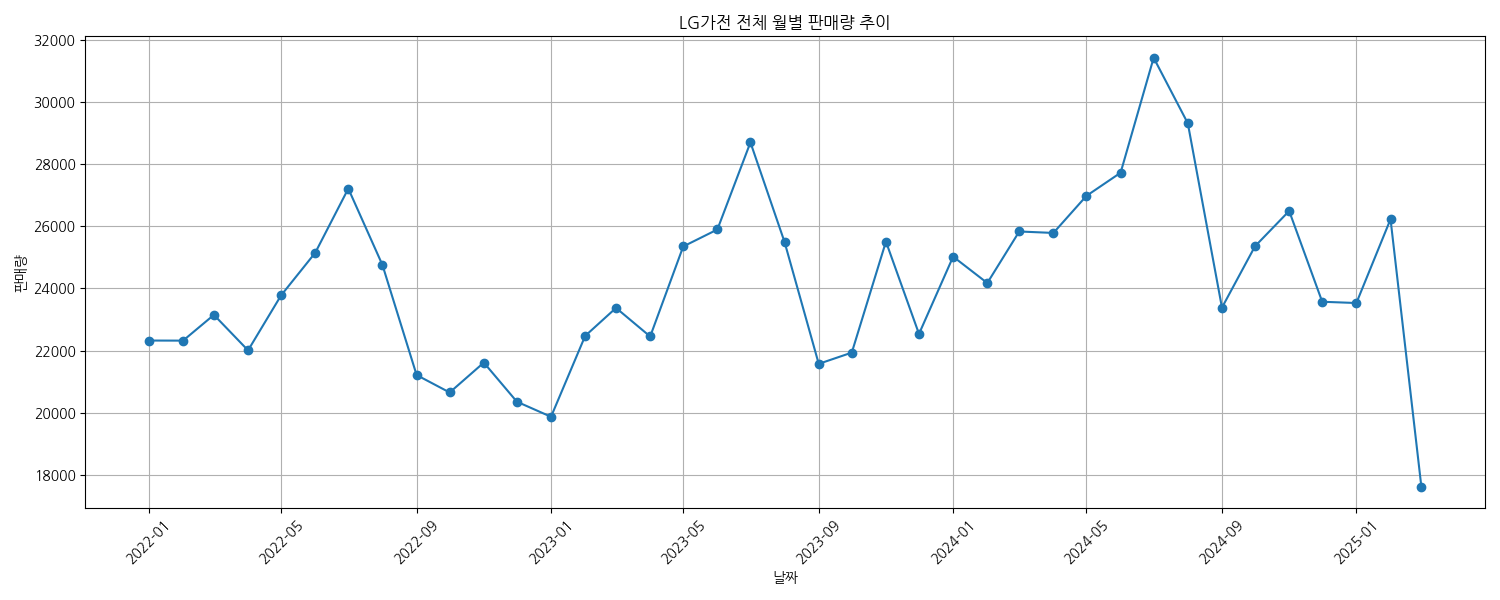

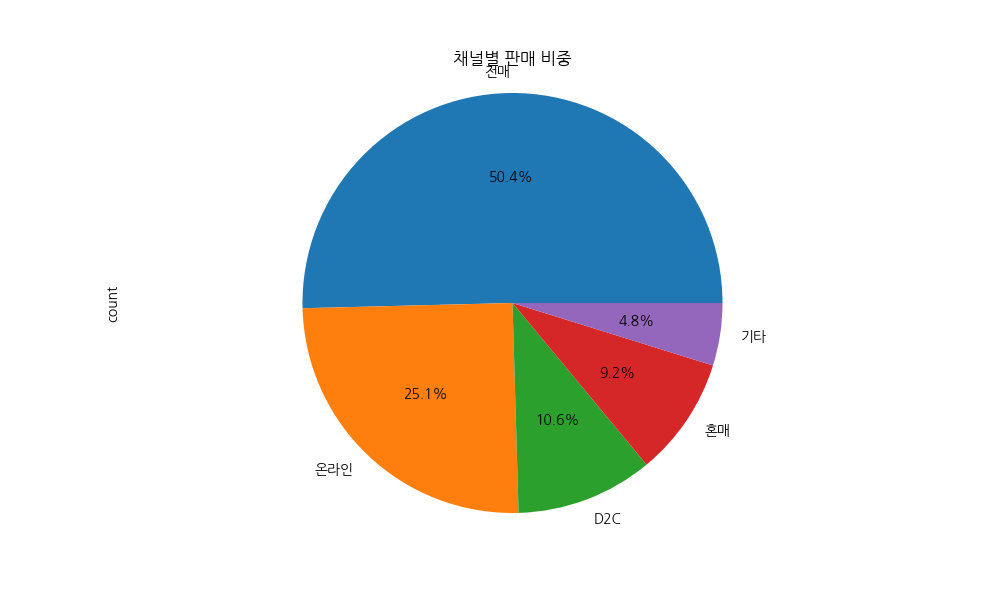

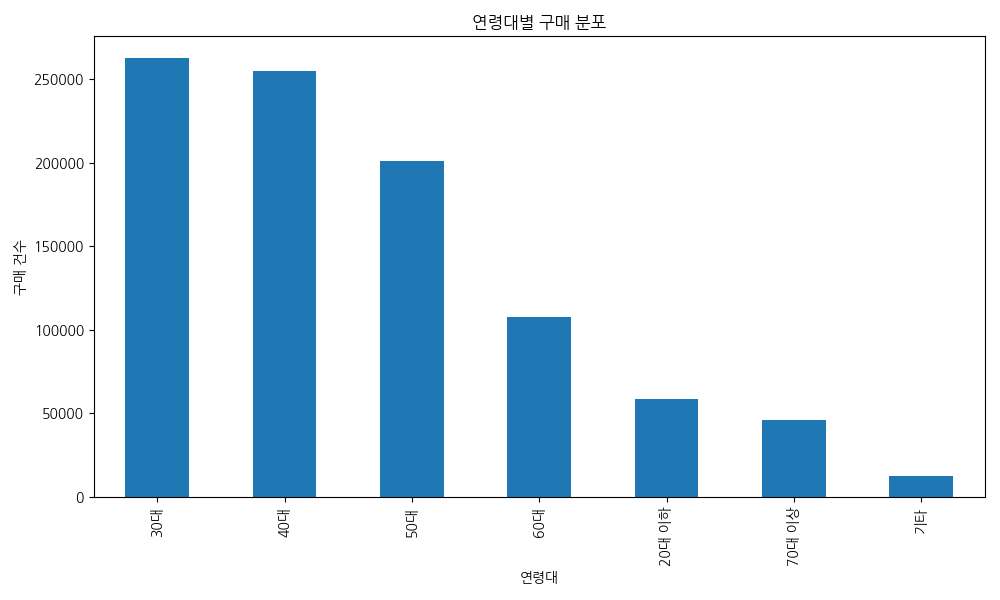

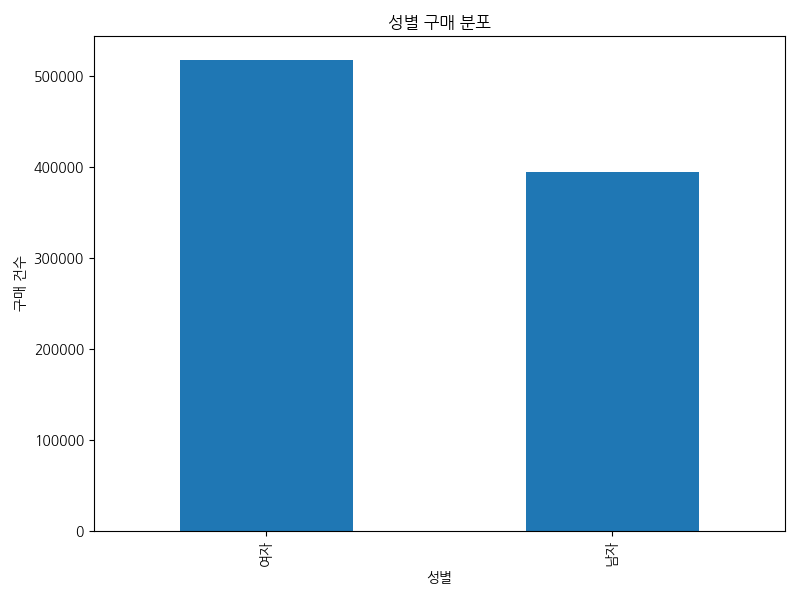

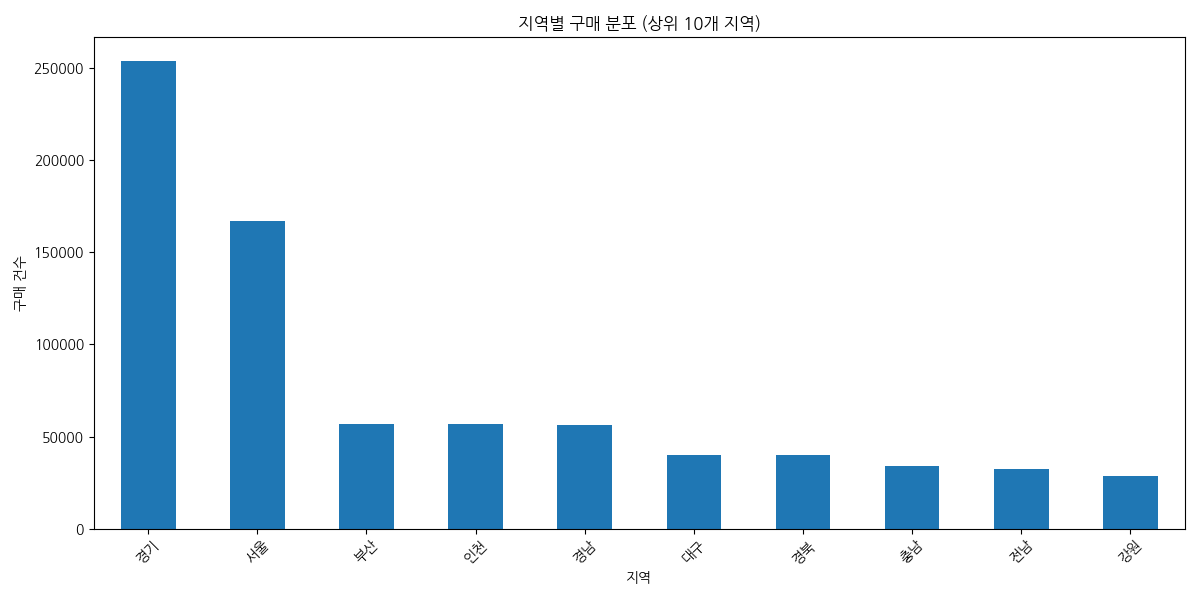

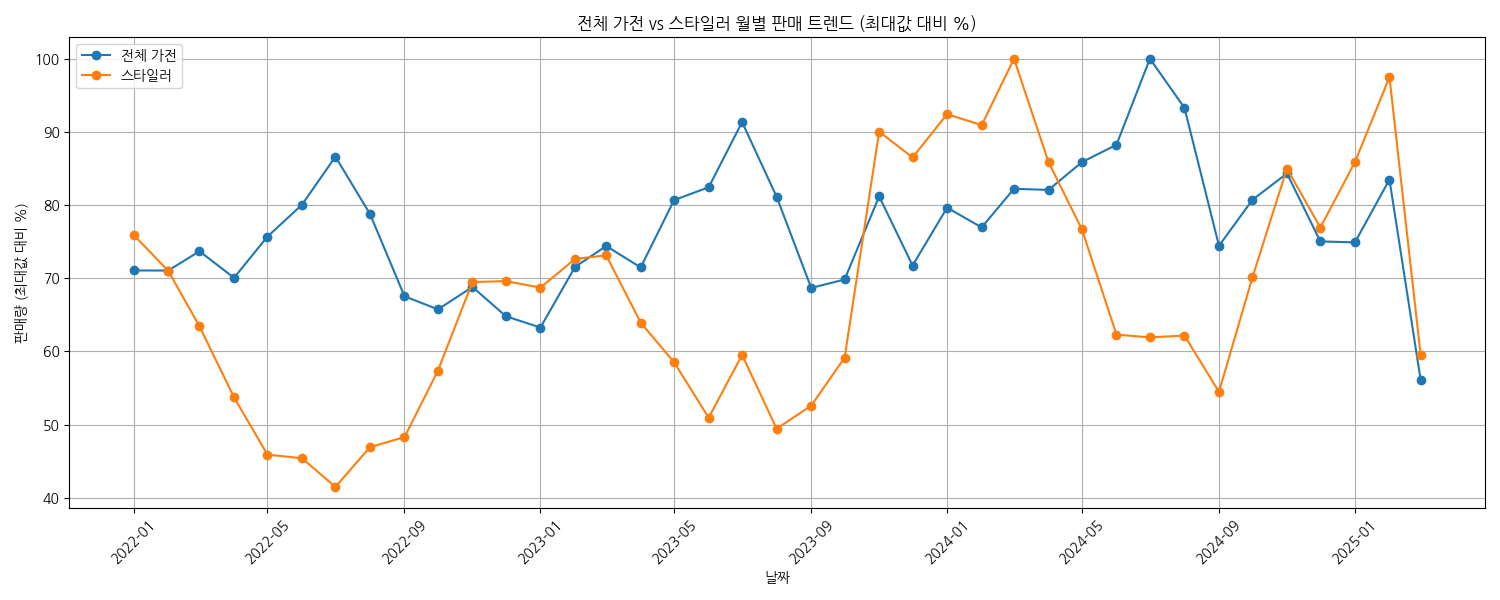

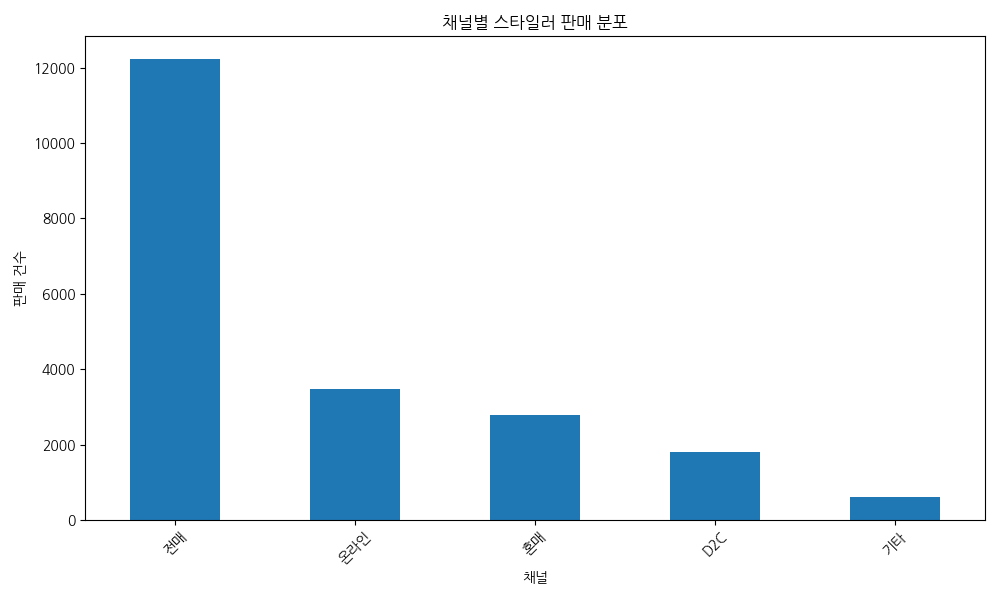

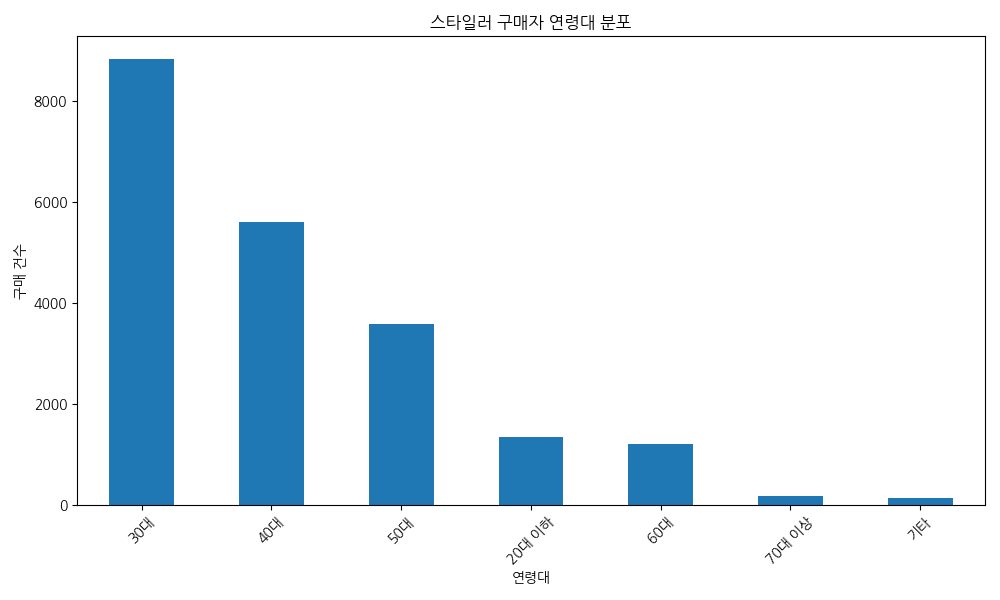


INFO [src.tools.python_repl] ===== Code execution successful =====


DEBUG    [src.tools.decorators] Tool handle_python_repl_tool returned: Successfully executed:
```python
from IPython.display import Image, display
import matplotlib.pyplot as plt
import numpy as np

# 주요 시각화 파일 목록
key_visualizations = [
    './artifacts/overall_sales_trend.png',
    './artifacts/channel_sales_pie.png',
    './artifacts/age_sales.png',
    './artifacts/gender_sales.png',
    './artifacts/region_sales.png',
    './artifacts/styler_vs_total_trend.png',
    './artifacts/styler_channel_dist.png',
    './artifacts/styler_age_dist.png'
]

# 시각화 파일 확인 및 출력
for viz_file in key_visualizations:
    print(f"Displaying: {viz_file}")
    display(Image(filename=viz_file, width=600))
    print("\n")
```
Stdout: Displaying: ./artifacts/overall_sales_trend.png


Displaying: ./artifacts/channel_sales_pie.png


Displaying: ./artifacts/age_sales.png


Displaying: ./artifacts/gender_sales.png


Displaying: ./artifacts/region_sales.png


Displaying: ./artifacts/styler_vs_total_trend.png


Di


DEBUG [src.graph.nodes] 
Reporter - current state messages:
[ { 'content': [ { 'text': 'Response from coder:\n'
                           '\n'
                           '<response>\n'
                           '\n'
                           '\n'
                           '모든 분석이 완료되었습니다. 주요 분석 결과를 요약하면 다음과 같습니다:\n'
                           '\n'
                           '1. **전체 LG가전 판매 트렌드**:\n'
                           '   - 월평균 판매량: 24,157개\n'
                           '   - 채널별 비중: 전매(50.4%), 온라인(25.1%), D2C(10.6%), 혼매(9.2%), 기타(4.8%)\n'
                           '   - 주 구매층: 30-40대(54.8%), 여성(56.7%)\n'
                           '   - 주요 지역: 경기(33.1%), 서울(21.8%)\n'
                           '\n'
                           '2. **스타일러 판매 특성**:\n'
                           '   - 전체 가전 대비 비중: 2.22% (20,898건)\n'
                           '   - 채널별 비중: 전매(58.5%), 온라인(16.6%), 혼매(13.3%), D2C(8.7%)\n'
                           '   - 주 구매층: 30-40대(69.1%), 여성(57.8%)\n'
     

boto3 Bedrock client successfully created!
bedrock-runtime(https://bedrock-runtime.us-west-2.amazonaws.com)
enable_reasoning False
self.llm.additional_model_request_fields None
self.llm.inference_config {'maxTokens': 24576, 'temperature': 0.01}
{"next": "FINISH"}


DEBUG [src.graph.nodes] 
Supervisor - current state messages:
[ { 'content': [ { 'text': '\n'
                           '\n'
                           '\n'
                           '\n'
                           "Based on all the information gathered, I'll now create a comprehensive "
                           'report on the LG appliance sales trends analysis.\n'
                           '\n'
                           '# LG 가전 판매 트렌드 분석 보고서\n'
                           '\n'
                           '## 개요 (Executive Summary)\n'
                           '\n'
                           '본 보고서는 2022년 1월부터 2025년 3월까지의 LG 가전제품 판매 데이터를 분석하여 전체 가전제품과 스타일러 제품의 '
                           '판매 트렌드 및 고객 특성을 파악하는 것을 목적으로 합니다. 분석 결과, LG 가전제품은 월평균 24,157개가 판매되며, '
                           '전매 채널이 전체 판매의 50.4%로 가장 높은 비중을 차지하고 있습니다. 주요 구매층은 30-40대(54.8%)와 '
                           '여성(56.7%)이며, 경기(33.1%)와 서울(21.8%) 지역에서 가장 많이 판매되고 있습니다. 스타일러 제품은 전체 가전 '
                           

DEBUG    [src.workflow] Final workflow state: {'TEAM_MEMBERS': ['researcher', 'coder', 'browser', 'reporter'], 'next': '__end__', 'full_plan': '{\n  "thought": "I need to plan a comprehensive analysis of LG appliance sales trends, focusing both on overall trends and specifically on Styler product. The data is available in the \'./data-pq\' directory, with column descriptions in \'./trend_analysis_desc.json\'. I\'ll assign the Coder to perform all data analysis tasks including data loading, exploration, analysis, and visualization. Then, I\'ll have the Reporter compile all findings into a detailed markdown report with charts and explanations.",\n  "title": "LG 가전 판매 트렌드 분석 및 보고서 작성",\n  "steps": [\n    {\n      "agent_name": "Coder",\n      "title": "데이터 분석 및 시각화",\n      "description": "[ ] \'./data-pq\' 디렉토리에서 데이터 로드 및 \'./trend_analysis_desc.json\' 파일에서 컬럼 설명 확인\\n[ ] 데이터 탐색 및 전처리 수행\\n[ ] LG가전 전체의 판매 트렌드 분석 (판매 증감, 연도별 추이)\\n[ ] 판매 채널별 LG가전 판매 트렌드 분석\\n[ ] 고객 특성(성별, 연령, 지역, 주택 공시가격,

<Figure size 1500x600 with 0 Axes>

<Figure size 1500x600 with 0 Axes>

In [6]:
import os
import shutil

def remove_artifact_folder(folder_path="./artifacts/"):
    """
    ./artifact/ 폴더가 존재하면 삭제하는 함수
    
    Args:
        folder_path (str): 삭제할 폴더 경로
    """
    if os.path.exists(folder_path):
        print(f"'{folder_path}' 폴더를 삭제합니다...")
        try:
            # 폴더와 그 내용을 모두 삭제
            shutil.rmtree(folder_path)
            print(f"'{folder_path}' 폴더가 성공적으로 삭제되었습니다.")
        except Exception as e:
            print(f"오류 발생: {e}")
    else:
        print(f"'{folder_path}' 폴더가 존재하지 않습니다.")


#import nest_asyncio
#nest_asyncio.apply()

remove_artifact_folder()

result = run_agent_workflow(
    user_input=user_query,
    debug=True
)

# Print the conversation history
print("\n=== Conversation History ===")
print ("result", result)
for history in result["history"]:

    print ("===")
    print (f'agent: {history["agent"]}')
    print (f'message: {history["message"]}')


In [ ]:
from datetime import datetime
template = open(os.path.join("./src/prompts/reporter.md")).read()
context = {"CURRENT_TIME": datetime.now().strftime("%a %b %d %Y %H:%M:%S %z")}
system_prompts = template.format(**context)    

In [ ]:
from langchain_community.tools.tavily_search import TavilySearchResults

In [ ]:
from src.crawler import Crawler

In [ ]:
crawler = Crawler()
        


In [ ]:
url = "https://docs.aws.amazon.com/ko_kr/bedrock/latest/userguide/tool-use-examples.html"
# Crawl the URL
article = crawler.crawl(url)

In [ ]:
먼저 matplotlib 설정 파일 위치 확인:

> /home/app_user/.local/lib/python3.12/site-packages/matplotlib/mpl-data/matplotlibrc
출력된 경로의 matplotlibrc 파일을 수정합니다:
$ sudo vi /home/app_user/.local/lib/python3.12/site-packages/matplotlib/mpl-data/matplotlibrc
matplotlibrc 파일에서 다음 줄을 찾아 주석 해제하고 수정하거나, 없으면 추가합니다:
font.family: sans-serif
font.sans-serif: NanumGothic
마이너스 기호가 깨지는 것을 방지하기 위해 다음 설정도 추가합니다:
axes.unicode_minus: False
 
matplotlib 폰트 캐시 삭제
설정 변경 후 matplotlib의 폰트 캐시를 삭제해야 합니다:
$ rm -rf ~/.cache/matplotlib/*

In [ ]:
import matplotlib
print(matplotlib.matplotlib_fname())

In [ ]:
!sudo vi /home/app_user/.local/lib/python3.12/site-packages/matplotlib/mpl-data/matplotlibrc